# Diffraction by a single slit

Let us consider a light source passing through a simple slit. The technique is the following:

* Definition of light source at the plane of the mask $u_0(x)$
* Definition of mask $t(x)$
* Determination of light field after the mask $t_1(x) = t(x) * u_0(x)$
* Propagation using Rayleigh-Sommerfed `RS`  `BPM` for a certain distance z
* Also, the Far Field intensity distribution using `FFT` can be determined.

We show how to analyze diffractive effects using the different frames X, XY, and XZ.

## X

In [1]:
from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.utils_drawing import draw_several_fields


In [2]:
x0 = np.linspace(-50 * um, 50 * um, 1024 * 32)
wavelength = 5 * um


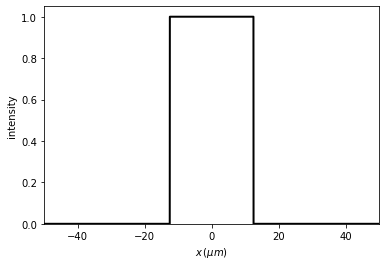

In [3]:
# plane wave
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0)

# slit
t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=25 * um)
t0.draw()

u1 = u0 * t0


Good result: factor 906.65
Good result: factor 3479.13


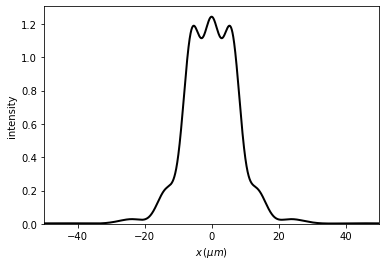

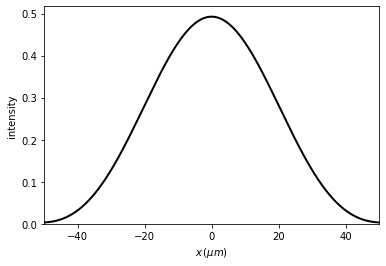

In [4]:
# Propagation a certain distance and draw
u2 = u1.RS(z=25 * um, new_field=True, verbose=True)
u2.draw(kind='intensity')

u3 = u1.RS(z=250 * um, new_field=True, verbose=True)
u3.draw(kind='intensity')


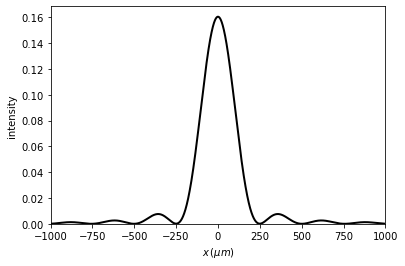

In [20]:
u4 = u1.RS(z=5 * mm, amplification=50, new_field=True, verbose=False)
u4.draw(kind='intensity')


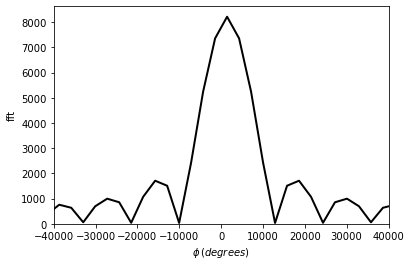

In [6]:
u5 = u2.fft(z=1 * mm, remove0=False, new_field=True)
u5.draw(kind='fft', logarithm=False, normalize=True)
plt.xlim(-40000, 40000)
plt.ylim(bottom=0)


## XY

In [7]:
from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw_several_fields


In [8]:

x0 = np.linspace(-200 * um, 200 * um, 512)
y0 = np.linspace(-200 * um, 200 * um, 512)



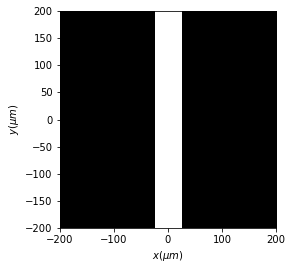

In [9]:
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave(A=1)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.slit(x0=0, size=50 * um, angle=0 * degrees)

u2 = u1 * t1
u2.draw()

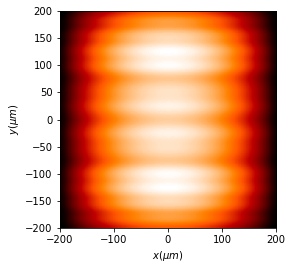

In [10]:
u3 = u2.RS(z=2 * mm, new_field=True)
u3.draw(logarithm=1e3)

In [11]:
u3 = u2.fft(remove0=False, new_field=True)


In [12]:
u3.cut_resample(x_limits='', y_limits='', num_points=[1024, 1024])


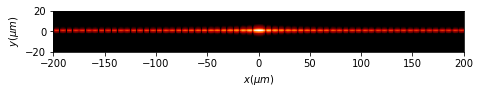

In [13]:
u3.draw(logarithm=1)
plt.ylim(-20,20)

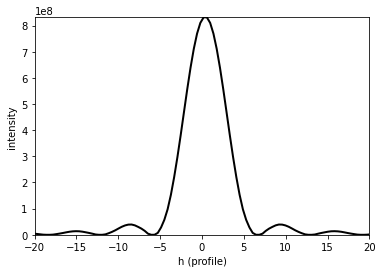

In [14]:
u3.draw_profile(point1=(u3.x[0], 0),
                point2=(u3.x[-1], 0),
                npixels=1024,
                kind='intensity',
                order=1)
plt.xlim(-20, 20)


## XZ

In [15]:
from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ


In [16]:
x = np.linspace(-20 * um, 20 * um, 512)
z = np.linspace(0 * um, 50 * um, 512)
wavelength = 2 * um

u1 = Scalar_source_X(x=x, wavelength=wavelength)
u1.plane_wave(theta=0)

t0 = Scalar_mask_X(x=x, wavelength=wavelength)
t0.slit(x0=0, size=10 * um)


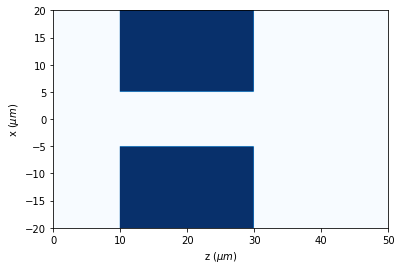

In [17]:
t1 = Scalar_mask_XZ(x=x, z=z, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = z0 + 20 * um
v_globals = dict(z0=z0, z1=z1)
t1.extrude_mask(t=t0,
                z0=z0,
                z1=z1,
                refractive_index=1.5 + 2j,
                v_globals=v_globals)
t1.draw_refractive_index(draw_borders=False, )


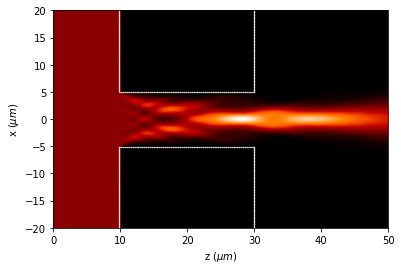

In [18]:

t1.incident_field(u1)

t1.WPM(has_edges=False)
t1.draw(kind='intensity', draw_borders=True)


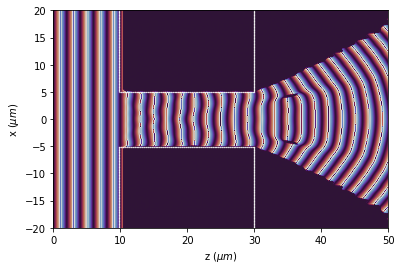

In [19]:
t1.draw(kind='phase', draw_borders=True, percentage_intensity=0.001)
